### Multivariate linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

It is assumed that for all $1\leqslant i \leqslant n$, 

$$
Y_i = X^\top_i \beta_{\star} + \varepsilon_i\,,
$$

where the $(\varepsilon_i)_{1\leqslant i\leqslant n}$ are i.i.d. random variables in $\mathbb{R}$, $X_i\in\mathbb{R}^d$ and $\beta_{\star}$ is an unknown vector in $\mathbb{R}^d$. Let $Y\in\mathbb{R}^n$ (resp. $\varepsilon\in\mathbb{R}^n$)  be the random vector such that  for all $1\leqslant i \leqslant n$, the $i$-th component of $Y$ (resp. $\varepsilon$) is $Y_i$ (resp. $\varepsilon_i$) and $X\in\mathbb{R}^{n\times d}$ the matrix with line $i$ equal to $X^\top_i$. The model is then written

$$
Y = X \beta_{\star} + \varepsilon\,.
$$

In this section, it is assumed that $\mathbb{E}[\varepsilon] = 0$ and $\mathbb{E}[\varepsilon \varepsilon^\top] = \sigma_{\star}^2 I_n$. The penalized least squares estimate of $\beta_{\star}$ is defined as a solution to

$$
\widehat \beta_n\in  \mathrm{argmin}_{\beta\in\mathbb{R}^d}\,\left( \|Y - X\beta\|_2^2 + \lambda \|\beta\|_2^2\right)\,.
$$

where $\lambda>0$.

<font color=darkred> Explain why the loss function is penalized </font>

The matrix $X^\top X + \lambda I_n$ is definite positive for all $\lambda>0$ as for all $u\in\mathbb{R}^d$,

$$
u^\top(X^\top X + \lambda I_n)u = \|Xu\|_2^2 + \lambda \|u\|_2^2\,,
$$

which is positive for all $u\neq 0$. 

Therefore,  the matrix $X^\top X + \lambda I_n$ is invertible for all $\lambda>0$. Using that for all $\beta>0$,

$$
\nabla \left(\|Y - X\beta\|_2^2 + \lambda \|\beta\|_2^2\right) = 2X^\top X\beta - 2X^\top Y +  2\lambda\beta = 2\left\{\left(X^\top X + \lambda I_d\right)\beta -X^\top Y\right\}\,.
$$

Therefore,

$$
\widehat \beta_n = \left(X^\top X + \lambda I_d\right)^{-1}X^\top Y\,.
$$

<font color=darkred> Prove that the bias is given by 
$$
\mathbb{E}[\widehat \beta_n] - \beta_* = - \lambda(X^\top X + \lambda I_d)^{-1}\beta_*\,.
$$</font>

Note first that $\mathbb{E}[Y] = X\beta_*$ which yields

$$
\mathbb{E}[\widehat \beta_n] = \left(X^\top X + \lambda I_d\right)^{-1}X^\top X\beta_*
$$

and

$$
\mathbb{E}[\widehat \beta_n] - \beta_* = \left(X^\top X + \lambda I_d\right)^{-1}X^\top X\beta_* - \beta_* = \left(X^\top X + \lambda I_d\right)^{-1}\left(X^\top X - \left(X^\top X + \lambda I_d\right)\right)\beta_* = - \lambda(X^\top X + \lambda I_d)^{-1}\beta_*\,.
$$

<font color=darkred>Prove that the variance is given by
$$
\mathbb{V}[\widehat \beta_n] = \sigma_\star^2(X^\top X + \lambda I_d)^{-2}X^\top X\,.
$$</font>

By definition of $\widehat\beta_n$,

$$
\mathbb{V}[\widehat \beta_n] = \left(X^TX + \lambda I_d\right)^{-1}X^T\mathbb{V}[Y]X\left(X^TX + \lambda I_d\right)^{-1} = \sigma_*^2\left(X^TX + \lambda I_d\right)^{-1}X^TX\left(X^TX + \lambda I_d\right)^{-1}\,,
$$

since $\mathbb{V}[Y] = \sigma_*^2 I_n$. Let $\lambda_1,\ldots,\lambda_d\geqslant 0$ be the eignevalues of $X^TX$. Then, there exits an orthogonal matrix $P$, such that

$$
X^\top X = P^{-1}\Delta P \quad\mathrm{and}\quad X^\top X + \lambda I_d = P^{-1}\tilde\Delta P\,,
$$

where $\Delta = \mathrm{diag}(\lambda_1,\ldots,\lambda_d)$ and $\tilde\Delta = \mathrm{diag}(\lambda_1 + \lambda,\ldots,\lambda_d+\lambda)$.

$$
\left(X^\top X + \lambda I_d\right)^{-1}X^\top X\left(X^\top X + \lambda I_d\right)^{-1} = P^{-1}\tilde\Delta^{-1} PP^{-1}\Delta PP^{-1}\tilde\Delta^{-1} P = P^{-1}\tilde\Delta^{-2}PP^{-1}\Delta P = \sigma_\star^2(X^\top X + \lambda I_d)^{-2}X^\top X\,.
$$

#### Import data

In [2]:
import pandas as pd

Data frames can be imported using pandas. This provides two-dimensional and heterogeneous tabular data.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

<font color=darkred>Prove that the variance is given by
Import data in the file BRinf using ``read_csv``, display the first rows with ``head`` and the shape of the dataframe using ``shape``.
</font>

In [3]:
# In this section, multivariate linear regression is used to predic the Brazilian inflation based on
# many observed variables, see https://github.com/gabrielrvsc/HDeconometrics/
df = pd.read_csv('./BRinf')
df.head()

,Unnamed: 0,Brazil CPI IPCA MoM,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
0,2003-01-31,2.25,2.33,2.17,5.816,2.29,11.56,25422.0,-359,-1.47,...,0.80,0.68,4.0000,1.96,3.8416,0.18,1.3225,1.15,1.3225,0.24
1,2003-02-28,1.57,2.28,1.59,4.351,2.42,10.95,25163.0,-303,-1.21,...,0.68,0.48,2.5600,1.60,2.5600,0.26,0.7569,0.91,0.8281,0.27
2,2003-03-31,1.23,1.53,1.66,4.593,1.58,9.58,24960.0,115,-0.35,...,0.55,0.50,0.8836,0.93,0.8649,0.13,0.4900,0.73,0.5329,0.17
3,2003-04-30,0.97,0.92,0.41,1.173,1.24,8.88,25284.0,93,-0.15,...,0.45,0.78,1.0000,0.97,0.9409,0.14,0.2500,0.52,0.2704,0.18
4,2003-05-31,0.61,-0.26,-0.67,-1.860,0.02,8.22,24785.0,285,-0.47,...,0.60,0.43,0.2500,0.50,0.2500,0.10,0.3025,0.55,0.3025,0.15


In [4]:
# number of observations, number of variables
df.shape

(156, 93)

<font color=darkred>
Use the ``StandardScaler`` of sklearn to preprocess the input variables.
</font>

``StandardScaler`` standardizes the input variables by removing the mean and scaling to unit variance.
We will not analyze closely standardization in this course. However, it is often very useful (even mandatory in some cases) for the stability of learning procedures.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df.iloc[:,2:] )

In [6]:
# first coordinate is the number of samples
# second coordinate is the number of input features (+ 1 for the observations)
np.shape(X)

(156, 91)

<font color=darkred>
Build two datasets. 
    ``X_train`` and ``Y_train`` contain the first 140 input data and observations. ``X_test`` and ``Y_test`` contain the remaining input data and observations. We train a linear regression model using ``X_train`` and ``Y_train`` and we assess the performance of the model using ``X_test`` and ``Y_test``. 
</font>

https://pandas.pydata.org/docs/reference/frame.html

In [10]:
nb_data_train = 140
nb_diff       = df.shape[0]-nb_data_train
# inflation observations
Y_train = df.iloc[0:nb_data_train,1] 
Y_test  = df.iloc[-nb_diff:,1] 
Y_test.head()

140    0.57
141    0.42
142    0.51
143    0.78
144    1.24
Name: Brazil CPI IPCA MoM, dtype: float64

In [11]:
# other variables
X_train = X[0:nb_data_train,:] 
X_test  = X[-nb_diff:,:] 
np.shape(X_train)

(140, 91)

#### Regression from scractch

<font color=darkred>
Write a cost function with inputs ``X``, ``Y`` and a regression parameter ``beta``. This function returns the mean squared error between observations and linear predictions.
</font>

In [13]:
def cost_function(X, Y, beta):
    n = len(Y)
    loss = np.sum((X.dot(beta) - Y) ** 2)/(2 * n)
    return loss

<font color=darkred>
If we do not use the closed form expression of the estimator, we can minimize the cost function using gradient descent. Write a function ``gradient_descent`` which iteratively minimizes the cost function using gradient descent. The arguments of the function are ``X``, ``Y``, the initial estimate ``beta``, a stepsize ``gamma`` and the maximum number of iterations ``n_it``. The function returns the last parameter estimate and the loss values computed at each iteration.
</font>

In [14]:
def gradient_descent(X, Y, beta, gamma, iterations):
    cost = np.zeros(iterations)
    n = len(Y)
 
    for iteration in range(n_it):
        err = X.dot(beta) - Y
        gradient = X.T.dot(err) / n

        beta = beta - gamma * gradient
        
        cost[iteration] = cost_function(X, Y, beta)
 
    return beta, cost

<font color=darkred>
Run a training using gradient descent and display the cost function along iterations and the parameter estimate. See the influence of gamma.
</font>

In [15]:
# Initial Coefficients
beta = np.zeros(X_train.shape[1])
gamma = 0.01
n_it = 10000
beta_hat, cost = gradient_descent(X_train, Y_train, beta, gamma, n_it)

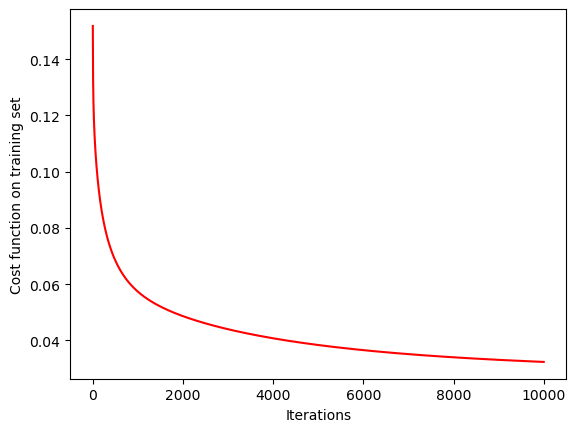

In [16]:
plt.xlabel("Iterations")
plt.ylabel('Cost function on training set')
plt.plot(cost,color='r')

In [17]:
beta_hat

array([ 3.31169711e-01,  9.94736499e-02, -2.12311288e-01, -3.33709536e-01,
        1.75678321e-01,  9.44255030e-02, -2.23517395e-02, -1.27785898e-02,
        4.49649166e-02,  3.02890639e-02, -1.23870184e-01,  9.43716194e-02,
        1.17703914e-01, -8.37512604e-02, -5.51427008e-02,  1.01368090e-01,
        8.52909501e-02, -1.34026731e-02,  2.50192423e-01, -2.25290758e-01,
        7.00505123e-02,  8.46916087e-02, -6.63631891e-02, -2.96461034e-02,
        3.25572926e-02,  4.93826155e-01, -5.81179916e-02,  2.93322347e-02,
       -4.57053613e-03, -1.65508634e-01, -2.02300830e-01,  1.17373136e-02,
       -2.06804374e-01,  2.99296020e-02, -6.05059905e-02, -1.54781745e-01,
        3.38546831e-02, -2.09470528e-01, -4.03267906e-02, -3.49467613e-02,
       -2.88228954e-01,  5.39915061e-02, -7.69145006e-02, -2.03162304e-02,
        1.41912589e-01, -9.51063426e-01,  3.86614366e-01,  1.15368719e-01,
       -2.50500750e-01, -2.20425508e-01,  3.20343257e-01,  5.71126432e-04,
        4.10432520e-01, -

<font color=darkred>
Compare the true observations and the predictions on the train and test sets.
</font>

In [18]:
y_test_hat = X_test.dot(beta_hat)
y_train_hat = X_train.dot(beta_hat)

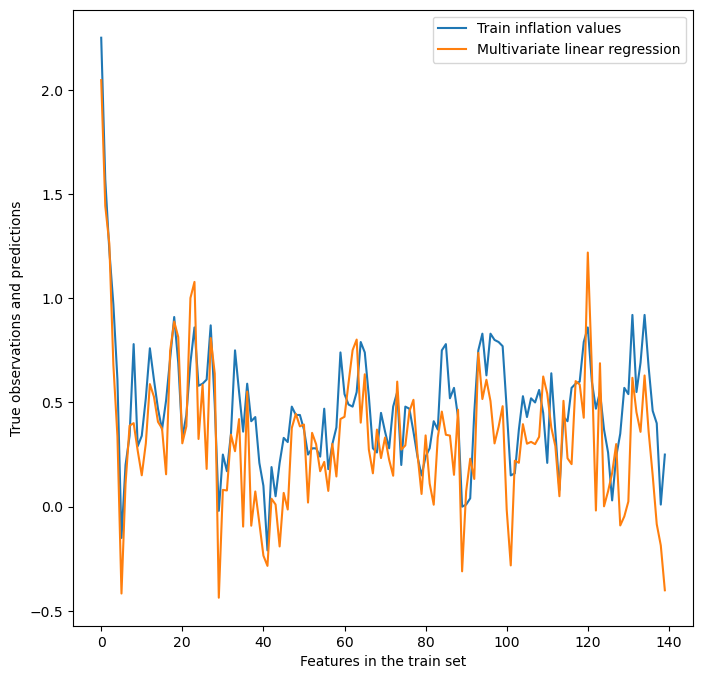

In [19]:
plt.figure(1,figsize=(8,8))
plt.xlabel("Features in the train set")
plt.ylabel('True observations and predictions')
plt.plot(Y_train.values)
plt.plot(y_train_hat)
plt.legend(labels=('Train inflation values','Multivariate linear regression'))

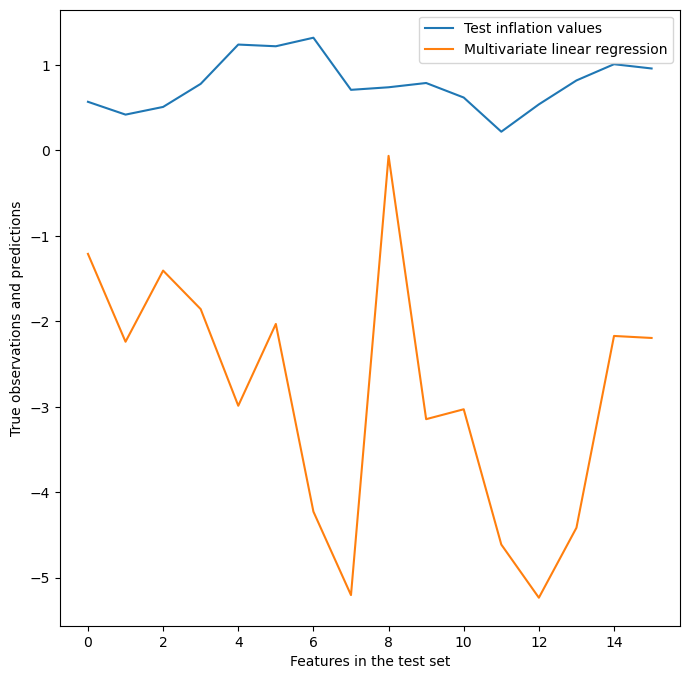

In [20]:
plt.figure(1,figsize=(8,8))
plt.xlabel("Features in the test set")
plt.ylabel('True observations and predictions')
plt.plot(Y_test.values)
plt.plot(y_test_hat)
plt.legend(labels=('Test inflation values','Multivariate linear regression'))

In [21]:
# Train loss
np.sum((X_train.dot(beta_hat) - Y_train) ** 2)/nb_data_train

0.06471712080113538

In [22]:
# Test loss
np.sum((X_test.dot(beta_hat) - Y_test) ** 2)/nb_diff

15.54019377570759

#### Regression using sklearn

<font color=darkred>
Fit a ``linear_model`` from sklearn to train a linear model (without Ridge penalization).
</font>

In [23]:
from sklearn import linear_model
reg_lin = linear_model.Ridge(alpha= 0.0)

In [24]:
reg_lin.fit(X_train, Y_train)

Ridge(alpha=0.0)

In [25]:
y_hat_lin = reg_lin.predict(X_train)

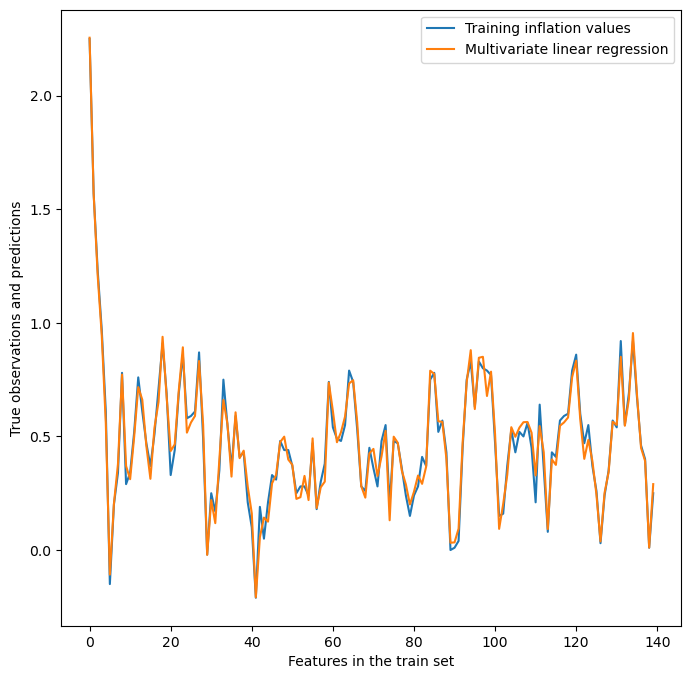

In [26]:
plt.figure(1,figsize=(8,8))
plt.xlabel("Features in the train set")
plt.ylabel('True observations and predictions')
plt.plot(Y_train.values)
plt.plot(y_hat_lin)
plt.legend(labels=('Training inflation values','Multivariate linear regression'))

In [27]:
y_hat_lin = reg_lin.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y_hat_lin,Y_test.values)

0.3981334373521286

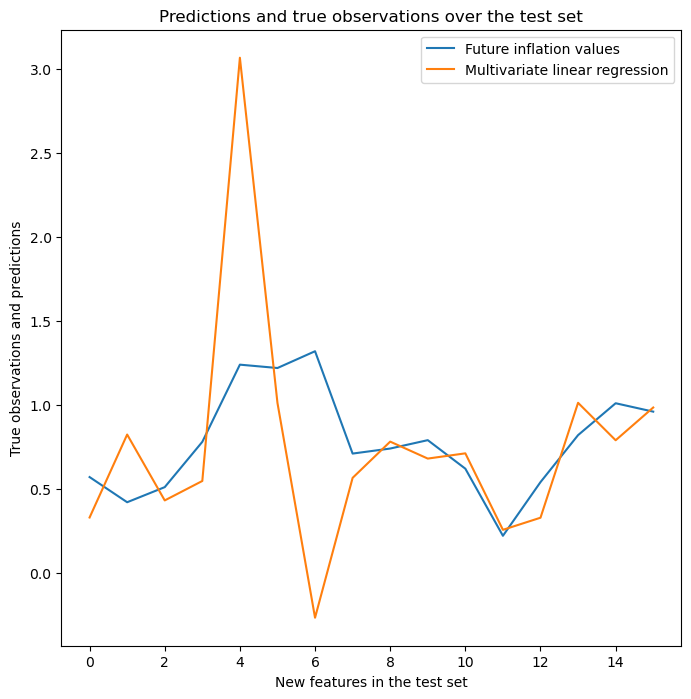

In [30]:
plt.figure(1,figsize=(8,8))
plt.title("Predictions and true observations over the test set")
plt.xlabel("New features in the test set")
plt.ylabel('True observations and predictions')
plt.plot(Y_test.values)
plt.plot(y_hat_lin)
plt.legend(labels=('Future inflation values','Multivariate linear regression'))

### Train test split

In [32]:
from sklearn.model_selection import train_test_split

``train_test_split`` splits arrays or matrices into random train and test subsets. It allows to train several times a model with different training set and analyze the variability of the performance on the test set.

<font color=darkred>
Use train_test_split to train 50 times a linear model using 90% of the data to estimate the unknown parameter and 10% to test the performance of the model. 
</font>

In [42]:
mse_train = []
mse_test = []
reg_lin = linear_model.Ridge(alpha= 0.0)
for iteration in range(50):
    train, test = train_test_split(X, test_size=0.1)
    X_train = train[:,2::] 
    X_test = test[:,2::] 
    Y_train  = train[:,1] 
    Y_test  = test[:,1] 
    reg_lin.fit(X_train, Y_train)
    y_hat_lin = reg_lin.predict(X_test)
    mse_test = np.append(mse_test,mean_squared_error(y_hat_lin,Y_test))
    y_hat_lin = reg_lin.predict(X_train)
    mse_train = np.append(mse_train,mean_squared_error(y_hat_lin,Y_train))

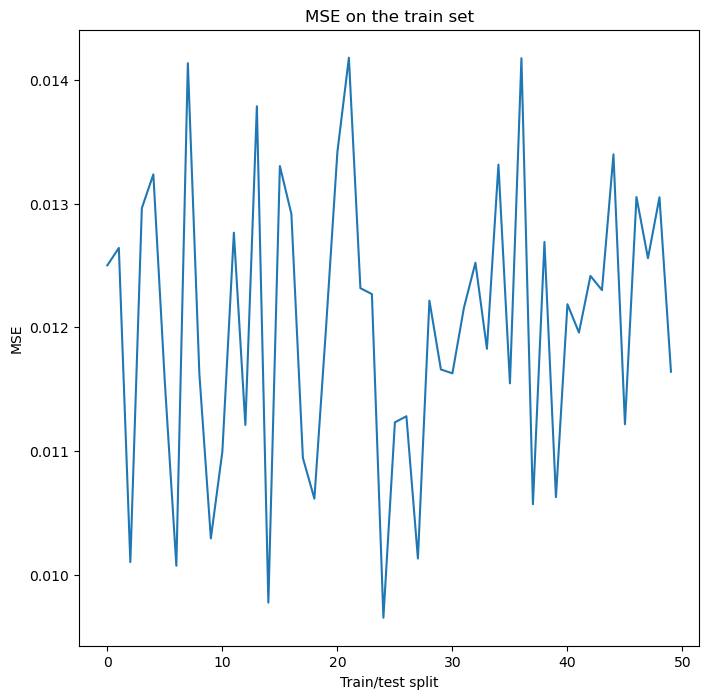

In [45]:
plt.figure(1,figsize=(8,8))
plt.title("MSE on the train set")
plt.xlabel("Train/test split")
plt.ylabel('MSE')
plt.plot(mse_train)

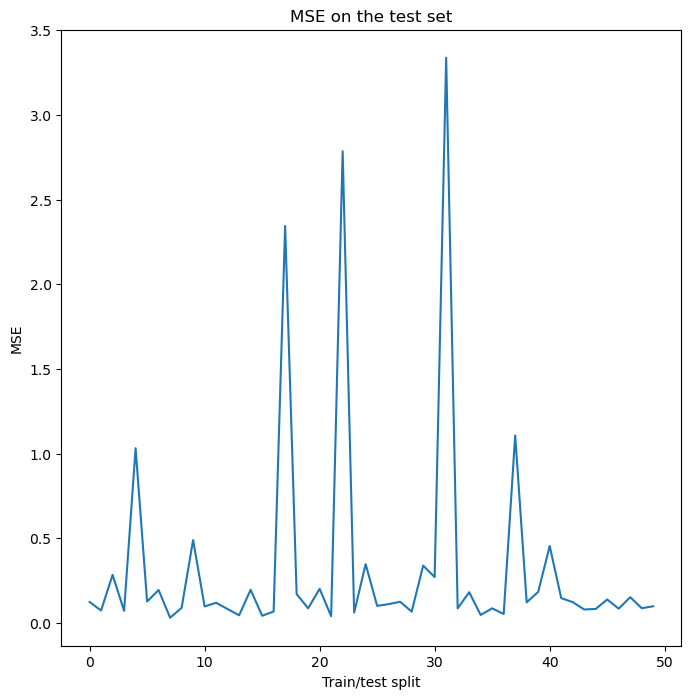

In [46]:
plt.figure(1,figsize=(8,8))
plt.title("MSE on the test set")
plt.xlabel("Train/test split")
plt.ylabel('MSE')
plt.plot(mse_test)